# Analysis of aggregation kinetic data

## What is this notebook for?

This jupyter notebook serves as a template for fast analysis and plotting of aggregation kinetic data. The aim is to provide a tool that can be used to analysise kinetic data files obtained from FLUOstar Omega plate readers (BMG Labtech, Offenburg, Germany. This will provide faster and more efficient data handling and produce puclication ready quality figures.

*This document will presumably serve as a supplementary document to a future paper (experimental details will not be included for those reasons)*


## aggregation kinetic analysis

Aggregation kinetic analysis are used to compare the aggregation of amyloidogenic proteins. A sample containing an amyloidogenic protein is supplemented with a fluorescent dye, such as Thioflavin T (ThT). As amyloid fibrils form, the fluorescent dye binds to the newly form fibrils, resulting in an increased fluorescence. The aggregation of the proteins can therefore be followed by recording the change in fluorescence as a function of time. The formation of amyloid fibrils is often observed as an sigmoidal curve.

## Background of the dataset that the script is build on

The data used for this jupyter notebook is a dataset collected of the amyloid forming protein alpha-synuclein. The aim of the experiment was to look at the inhibition effect of an inhibitor on the aggregation of alpha-synuclein. Different concentration of inhibitor was added to a constant concentration of alpha-synuclein. For comarison, the effect of a mutated inhibitor was tested. 

The concentration of alpha-synuclein was constant in all samples. Five different concentrations of wild-type inhibitor and mutant inhibitors were tested. In addition, alpha-synuclein alone was tested.This it the outline of the 96 well plate, where:

- <span style="color:red">M</span> = Mutant inhibitor
- <span style="color:green">Wt</span> = wild-type inhibitor
- <span style="color:blue">Alone</span> = only alpha-synuclein, no added inhibitors



|  | 1   | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    |10    | 11   |12    |
|- | :-: |:-:   |:-:   |:-:   |:-:   |:-:   |:-:   |:-:   |:-:   |:-:   |:-:   |:-:   |
|A |     |      |      |      |      |      |      |      |      |      |      |      |
|B |     |<span style="color:red">M:2µM</span>|<span style="color:red">M:2µM</span>|<span       style="color:red">M:2µM</span> | <span style="color:red">M:2µM</span>    ||<span style="color:Green">Wt:2µM</span>|<span style="color:Green">Wt:2µM</span>|<span style="color:Green">Wt:2µM</span>|<span style="color:Green">Wt:2µM</span> | | |
|C |    |<span style="color:red">M:1µM</span>|<span style="color:red">M:1µM</span> |<span style="color:red">M:1µM</span> |<span style="color:red">M:1µM</span> |     |<span style="color:Green">Wt:1µM</span>|<span style="color:Green">Wt:1µM</span>|<span style="color:Green">Wt:1µM</span>|<span style="color:Green">Wt:1µM</span> |       |     |
|D |     |<span style="color:red">M:0.5µM</span>|<span style="color:red">M:0.5µM</span>|<span style="color:red">M:0.5µM</span>|<span style="color:red">M:0.5µM</span>|   | <span style="color:Green">Wt:0.5µM</span>  |  <span style="color:Green">Wt:0.5µM</span>  |  <span style="color:Green">Wt:0.5µM</span>   |  <span style="color:Green">Wt:0.5µM</span>   |   |   |
|E |     |<span style="color:red">M:0.25µM</span>|<span style="color:red">M:0.25µM</span>|<span style="color:red">M:0.25µM</span>|<span style="color:red">M:0.25µM</span>|   |   <span style="color:Green">Wt:0.25µM</span>  | <span style="color:Green">Wt:0.25µM</span>  |<span style="color:Green">Wt:0.25µM</span> | <span style="color:Green">Wt:0.25µM</span>  |   |   |
|F |     |<span style="color:red">M:0.125µM</span>|<span style="color:red">M:0.125µM</span>|<span style="color:red">M:0.125µM</span>|<span style="color:red">M:0.125µM</span>|   | <span style="color:Green">Wt:0.125µM</span>  |<span style="color:Green">Wt:0.125µM</span> | <span style="color:Green">Wt:0.125µM</span>| <span style="color:Green">Wt:0.125µM</span>|   |   |
|G |     |   |   |   |   |   |   <span style="color:Blue">alone</span>|  <span style="color:Blue">alone</span> |  <span style="color:Blue">alone</span> |<span style="color:Blue">alone</span>   |   |   |
|H |     |   |   |   |   |   |   |   |   |   |   |   |



The purpose of this notebook is to make two plots for comparison: 
1. <span style="color:Green">alpha-synuclein + wild-type inhibitor</span> + <span style="color:Blue">alpha-synuclein alone</span>
2.  <span style="color:red">alpha-synuclein + wild-type inhibitor</span> + <span style="color:Blue">alpha-synuclein alone</span>

Each plot will show the average of the four replicates for each concentration, the standard deviation will been shown as a shade around the average. 

## To get started

In order to being able to use this notebook you will need to do the following steps:

1. Install Anaconda3 or miniconda3 in order to install the Jupyter Notebook. (miniconda is smaller)


2. Download the repository from GitHub


3. Navigate to the folder you downloaded from Github


4. Create environment:

    - There is a file in the folder called environment.yml. It contains the required packages.
    - create an environment by writing this command in the terminal:
    
```.py
conda env create -f tinna_environment.yml
```

5. Activate the environment by the following command:
    ```.py
    source activate project_env
    ```

5. Run Jupyter Notebook. Go into terminal, place yourself in directory where you see the folder that you downloaded from github. Write the following into the terminal:
    ```.py
     jupyter notebook
        ```


### import libraries needed for the data analysis

In [1]:
import numpy as np #data processing
import pandas as pd #data processing
import matplotlib as mpl #for plotting
import matplotlib.pyplot as plt #For plotting
from matplotlib.lines import Line2D #to custom make legends
import seaborn as sns #for custom made colour palets
%matplotlib inline

## The datafile 

The datafile you will have a large header containing information about the file and the run. For data analysis we are not interested in reading in the first 197 lines. 

![image](mynd.png)






## Set the number for the following variables yourself

***Now you will need to start altering/filling into the code accoring to your data file. The following has been chosen according to dataset used as an example.***

1. Give the variables "cycle_time" and "cycle_number" a value that corresponds to your experiments. You can find these values in the header of the datafile. 

    - The reason for doing this is that we want to index the columns with values according to the time the measurments were taken.
    
    

2. Here you have to type in which gain you want to use. If you want to use the first set of data, that corresponds to chromatic 1, then you type:
    ```.py
    select_chromatic = 1
    ```



In [2]:
#you have to fill in the following variables

cycle_time = 400 #type in the time_interval/cycle time in seconds
cycle_number = 560 #number of datapoints/cycles
select_chromatic = 1 #selec the chomatic you want


## Making an index for the columns

This code will make a dataserie that contains the time points of the measurments.

In [3]:
cycle_time_hours = cycle_time/3600 #converts the index from seconds to hours

#Makes a header containing an index called "wells" and time-series of the data
time_series = np.arange(start=0,stop=(cycle_number)*cycle_time_hours,step=cycle_time_hours, dtype=float).tolist() #Make a list with the time series of the data
header = ["well"] #The first column contains the names of the wells aswell as "chromatic" and "cycle"
header = header + time_series #make a list of first well followed by the time series
print("The size of the header is: ", len(header), ". The size of the header should be equal to the cycle_number + 1") #to see that the length of the header matches the shape of the dataframe



The size of the header is:  561 . The size of the header should be equal to the cycle_number + 1


## Read the data file (csv file)

- Your file is a csv file. 
- Place the datafile of interest in the same folder as the notebook file.  
- If you want to see how your file look then you can activate the following comman by taking away the #. The numbers sets how many lines you want to see from the top of the file, the following will give you the top 50 lines:
    ```.py
    !head -50 filename.csv
    ```

Here the data file is imported aswell as we index the columns by using the dataserie created above

In [4]:
#!head -100 171017_data.csv #to get a quick view of the first 200 lines of the file to see how data is separate

#Read the data and skip the header (first 197) lines until chromatic 1:
data_file = pd.read_csv("data.csv",  header=None, skiprows=197, sep=",s+|:+|,|s+", engine="python", names= header)

print("This is the shape of the data frame (rows, colums):", data_file.shape) #gives the shape of the dataframe, rows*columns
data_file.head(10) #Shows the top 10 lines of the data fram




This is the shape of the data frame (rows, colums): (588, 561)


,well,0.0,0.1111111111111111,0.2222222222222222,0.3333333333333333,0.4444444444444444,0.5555555555555556,0.6666666666666666,0.7777777777777777,0.8888888888888888,...,61.11111111111111,61.22222222222222,61.33333333333333,61.44444444444444,61.55555555555555,61.666666666666664,61.77777777777777,61.888888888888886,62.0,62.11111111111111
0,Chromatic,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cycle,1...560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A01,22,21.0,19.0,20.0,17.0,20.0,17.0,20.0,13.0,...,26.0,27.0,21.0,26.0,25.0,31.0,25.0,27.0,29.0,28.0
3,A02,22,16.0,21.0,18.0,17.0,23.0,17.0,24.0,21.0,...,30.0,26.0,28.0,25.0,26.0,30.0,23.0,27.0,28.0,29.0
4,A03,23,20.0,21.0,18.0,19.0,20.0,20.0,20.0,22.0,...,22.0,22.0,21.0,19.0,22.0,26.0,21.0,22.0,15.0,27.0
5,A04,19,20.0,23.0,20.0,20.0,22.0,22.0,21.0,23.0,...,22.0,20.0,24.0,24.0,23.0,21.0,18.0,27.0,22.0,22.0
6,A05,22,19.0,22.0,18.0,24.0,20.0,21.0,22.0,22.0,...,29.0,19.0,20.0,20.0,20.0,28.0,21.0,19.0,19.0,21.0
7,A06,19,21.0,19.0,25.0,22.0,21.0,19.0,24.0,22.0,...,23.0,26.0,23.0,28.0,26.0,30.0,24.0,29.0,25.0,24.0
8,A07,20,23.0,11.0,16.0,19.0,20.0,24.0,17.0,22.0,...,28.0,23.0,24.0,31.0,20.0,25.0,25.0,32.0,24.0,26.0
9,A08,22,16.0,21.0,22.0,19.0,20.0,21.0,24.0,22.0,...,22.0,24.0,27.0,23.0,26.0,24.0,29.0,29.0,23.0,26.0


## Indexing the data and selecting and slice out the part of the data you want to use

- The datafile contains several sets of data, where the different set are obtained by using different settings of chromatics/gain. 
- The number of datasets in your file depends on how many gains you used. 
- The aim of this part of the code is to slice out the data corresponding to the gain that you selected in the beginning of the script

- The following script will also change the indexing, so the first column, called **well**, will contain indexes for each row, that corresponds to the name of the wells in the 96 well plate. Each row in this data frame corresponds to data obtained form one well.


- After you run this script, you will see the full size dataframe (table), from well A01 to H12.


In [5]:
chromatic = data_file[data_file["well"]=="Chromatic"].index #find the indexes of all columns that have the word Chromatic
chromatic_index = chromatic[select_chromatic-1] #gives the index of the chromatic you want to use
print("this is the index of the row where chromatic you want to use starts: ", chromatic_index, type(chromatic_index))

#gives the indexes for the data that corresponds to the gain you selected
start_index = chromatic_index + 2
end_index = start_index+95 #if you do not have full plate, then you can adjust this according to your sample number.
print("This is the start index: ", start_index, "This is the end index:", end_index) 

#Truncate/slice the data set according to the selected indexes, 
data_use = data_file[start_index:end_index] #slicing and making a new data frame only including one data-set corresponding to a full plate
data_use.set_index(['well'],inplace=True) #make indexed be named accorind to well name
data_use #to have a look that it looks alright



this is the index of the row where chromatic you want to use starts:  0 <class 'numpy.int64'>
This is the start index:  2 This is the end index: 97


,0.000000,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,0.888889,1.000000,...,61.111111,61.222222,61.333333,61.444444,61.555556,61.666667,61.777778,61.888889,62.000000,62.111111
well,,,,,,,,,,,,,,,,,,,,,
A01,22,21.0,19.0,20.0,17.0,20.0,17.0,20.0,13.0,22.0,...,26.0,27.0,21.0,26.0,25.0,31.0,25.0,27.0,29.0,28.0
A02,22,16.0,21.0,18.0,17.0,23.0,17.0,24.0,21.0,25.0,...,30.0,26.0,28.0,25.0,26.0,30.0,23.0,27.0,28.0,29.0
A03,23,20.0,21.0,18.0,19.0,20.0,20.0,20.0,22.0,19.0,...,22.0,22.0,21.0,19.0,22.0,26.0,21.0,22.0,15.0,27.0
A04,19,20.0,23.0,20.0,20.0,22.0,22.0,21.0,23.0,16.0,...,22.0,20.0,24.0,24.0,23.0,21.0,18.0,27.0,22.0,22.0
A05,22,19.0,22.0,18.0,24.0,20.0,21.0,22.0,22.0,21.0,...,29.0,19.0,20.0,20.0,20.0,28.0,21.0,19.0,19.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H07,19,19.0,19.0,20.0,20.0,20.0,20.0,20.0,19.0,24.0,...,25.0,27.0,23.0,22.0,18.0,22.0,18.0,24.0,24.0,20.0
H08,17,21.0,22.0,22.0,24.0,22.0,18.0,19.0,27.0,26.0,...,28.0,23.0,23.0,20.0,21.0,23.0,24.0,20.0,23.0,22.0
H09,17,19.0,20.0,21.0,22.0,27.0,25.0,22.0,21.0,21.0,...,26.0,20.0,22.0,22.0,26.0,25.0,22.0,30.0,19.0,22.0


### Change values in the dataframe to floats

The first column (named 0.0) has values that are not float. Here we will change the values to float

In [6]:
data_use = data_use.apply(pd.to_numeric, downcast="float") #change values in all columns to floats
print("This is the type of the value in the first row, first column", type(data_use.loc["A01"][0.0])) # to check that the values have changed to float
data_use.head(5)



This is the type of the value in the first row, first column <class 'numpy.float32'>


,0.000000,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,0.777778,0.888889,1.000000,...,61.111111,61.222222,61.333333,61.444444,61.555556,61.666667,61.777778,61.888889,62.000000,62.111111
well,,,,,,,,,,,,,,,,,,,,,
A01,22.0,21.0,19.0,20.0,17.0,20.0,17.0,20.0,13.0,22.0,...,26.0,27.0,21.0,26.0,25.0,31.0,25.0,27.0,29.0,28.0
A02,22.0,16.0,21.0,18.0,17.0,23.0,17.0,24.0,21.0,25.0,...,30.0,26.0,28.0,25.0,26.0,30.0,23.0,27.0,28.0,29.0
A03,23.0,20.0,21.0,18.0,19.0,20.0,20.0,20.0,22.0,19.0,...,22.0,22.0,21.0,19.0,22.0,26.0,21.0,22.0,15.0,27.0
A04,19.0,20.0,23.0,20.0,20.0,22.0,22.0,21.0,23.0,16.0,...,22.0,20.0,24.0,24.0,23.0,21.0,18.0,27.0,22.0,22.0
A05,22.0,19.0,22.0,18.0,24.0,20.0,21.0,22.0,22.0,21.0,...,29.0,19.0,20.0,20.0,20.0,28.0,21.0,19.0,19.0,21.0


### Aggregate/group together the different variables, name them and transpose

The following script is to make a induvidual dataframes for each set of samples. In this example, each set of sample has for replicates. 

The set of samples will be names variable 1 to variable x, where x is the number of sample types you have. 

You have to fill in the name of the row/well into the code by replacing "well" with the name of the well, such as A01.  

If you have fewer or more than four replicates then you remowe or add more well names within the square brackets.

```.py
variable_X = data_use.agg(['well', 'well','well', 'well']).T
```

If you are analysis same type of data many time (eg. concentration series) then I recommend to arrange the same way into the 96 well plate and then you do not need to alter this between datasets.

In [7]:
#if you want to add a variable then fill into this:
#variable_x = (data_use.agg(['well', 'well','well', 'well']).T) #how many wells depends on how many replicates you have

variable_1 = data_use.agg(['B02', 'B03','B04', 'B05']).T

variable_2 = data_use.agg(['C02', 'C03','C04', 'C05']).T

variable_3 = data_use.agg(['D02', 'D03','D04', 'D05']).T

variable_4 = data_use.agg(['E02', 'E03','E04', 'E05']).T

variable_5 = data_use.agg(['F02', 'F03','F04', 'F05']).T

variable_6 = data_use.agg(['B07', 'B08','B09', 'B10']).T

variable_7 = data_use.agg(['C07', 'C08','C09', 'C10']).T

variable_8 = data_use.agg(['D07', 'D08','D09', 'D10']).T

variable_9 = data_use.agg(['E07', 'E08','E09', 'E10']).T

variable_10 = data_use.agg(['F07','F08', 'F09', 'F10']).T

variable_11 = data_use.agg(['G07', 'G08', 'G09', 'G10']).T

variable_1.head(5)




,B02,B03,B04,B05
0.000000,36.0,38.0,39.0,38.0
0.111111,36.0,42.0,39.0,38.0
0.222222,33.0,36.0,39.0,43.0
0.333333,36.0,35.0,34.0,36.0
0.444444,38.0,40.0,39.0,38.0


Now we have grouped together the wells that corresponds to replicates of samples of same kind/same conditions.

# Process and plot the data

### Mean and standar deviation of each group of data

This function calculates the mean and the standard deviation of each row in each dataframe. In otherwords, the mean and the std is calculated of the replicates within each dataframe. 
The average is then plotted with std as a shade around the average.

In [8]:
def plotave(x):
    """This funcion plot the average of variable selected with a standard deviation as a shade"""
    yerr = x.std(axis=1, numeric_only=None)
    y = x.mean(axis=1, numeric_only=None)
    a = plt.plot(y)
    b = plt.fill_between(y.index, (y+yerr).values, (y-yerr).values, alpha=.5)
    return (a)

#you have to paste as many variables as you have here:
#plottest = (plotave(variable_6), plotave(variable_7), plotave(variable_8), plotave(variable_9), plotave(variable_10), plotave(variable_11))
#plt.xlabel('Time/Hours',fontsize=12)
#plt.ylabel('Fluorescence Intensity',fontsize=12)
#plt.tight_layout()
#plt.savefig('notebook_project/figtest.png',dpi=300)

## Make your own colour pallet

You can use premade colourpallets but here you can make your own colour pallet. You can have more or less colours added, depending on how many samples you need to show within each graph. You can see the name of the available colour on this [webpage](https://xkcd.com/color/rgb/)



if you want to use pre-made pallet you can use this command:
```.py
sns.set_palette("husl")
```

More information about making your own colour pallet: https://seaborn.pydata.org/tutorial/color_palettes.html
and http://jose-coto.com/styling-with-seaborn


This is the colour pallet you made:


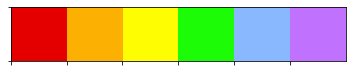

In [9]:
#MAKE YOUR OWN COLOUR PALLET
col_list = ["red", "yellow orange", "bright yellow", "highlighter green", "carolina blue","easter purple"]
sns.palplot(sns.xkcd_palette(col_list))
col_list_palette = sns.xkcd_palette(col_list)
sns.set_palette(col_list_palette) #set the custom made pallet as your colours, you can also use pre-made ones

print("This is the colour pallet you made:")
plt.show()

## Plot the data

The following script is for plotting the data. To make two different graphs, placed next to each other, with the legend on the right side of the graphs. The size, titles, labels can be altered by changing the code (see explainations within the code).

The name, size, and type of legends can be adjusted aswell.


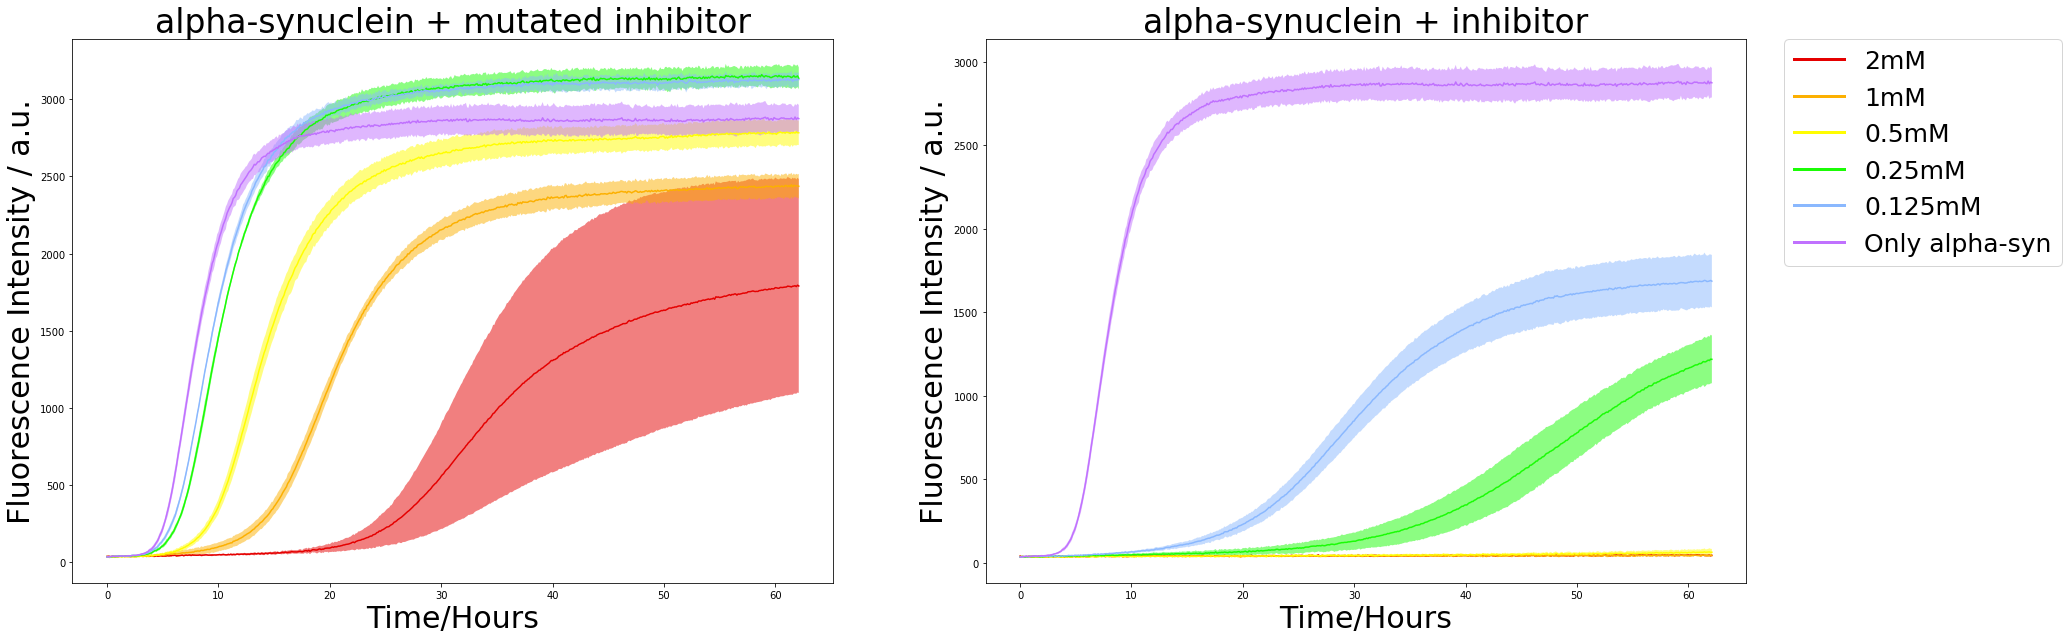

In [10]:
fig = plt.figure(figsize=(30,10))
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
#fig.suptitle("add title if you want", fontsize=30) #if you want title on top of the figure

#subplot 1
ax = fig.add_subplot(1,2,1) #tells: number of columns, number of rows, which subplot you are currently on 
#add the different variables/set of samples you want to plot together within the same plot, within the brackets of the following command.
plot1 = (plotave(variable_1), plotave(variable_2), plotave(variable_3), plotave(variable_4), plotave(variable_5), plotave(variable_11)) #plot the different set of samples into the same plot
plt.xlabel("Time/Hours",fontsize=30) #add the name of the y label within the ""
plt.ylabel("Fluorescence Intensity / a.u.",fontsize=30)#add the name of the x label within the ""
#plt.tight_layout() #if you want to make less space between gramphs then you van activate this command
plt.title("alpha-synuclein + mutated inhibitor", fontsize=33) #title of subplot 1

#subplot 2
ax = fig.add_subplot(1,2,2) #The second subplot
plot2 = (plotave(variable_6), plotave(variable_7), plotave(variable_8), plotave(variable_9), plotave(variable_10), plotave(variable_11))
plt.xlabel('Time/Hours',fontsize=30)
plt.ylabel('Fluorescence Intensity / a.u.',fontsize=30)
#plt.tight_layout() #if you want to make less space between gramphs
plt.title("alpha-synuclein + inhibitor", fontsize=33)

#add the legend on the right side to the plots.
colors = col_list_palette #Use the pallet that we made earlier to make the lines of the legend
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors] #make the lines in front of the test 
labels = ['2mM', '1mM', '0.5mM', "0.25mM", "0.125mM", "Only alpha-syn"] #names of legends, fill in yourself
ax.legend(lines, labels, prop={"size":25}, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) #add the legends, adjust the size and posision it to the upper left of the graph 

#plt.show()

plt.savefig("figoutside.png",dpi=300, bbox_inches="tight")




## legends inside each graph

Makes the same type of plots as above, but with legends inside each box, instead of outside of the box. Which one you use depends on personal taste, aswell as if the two plots can share a legend or not.

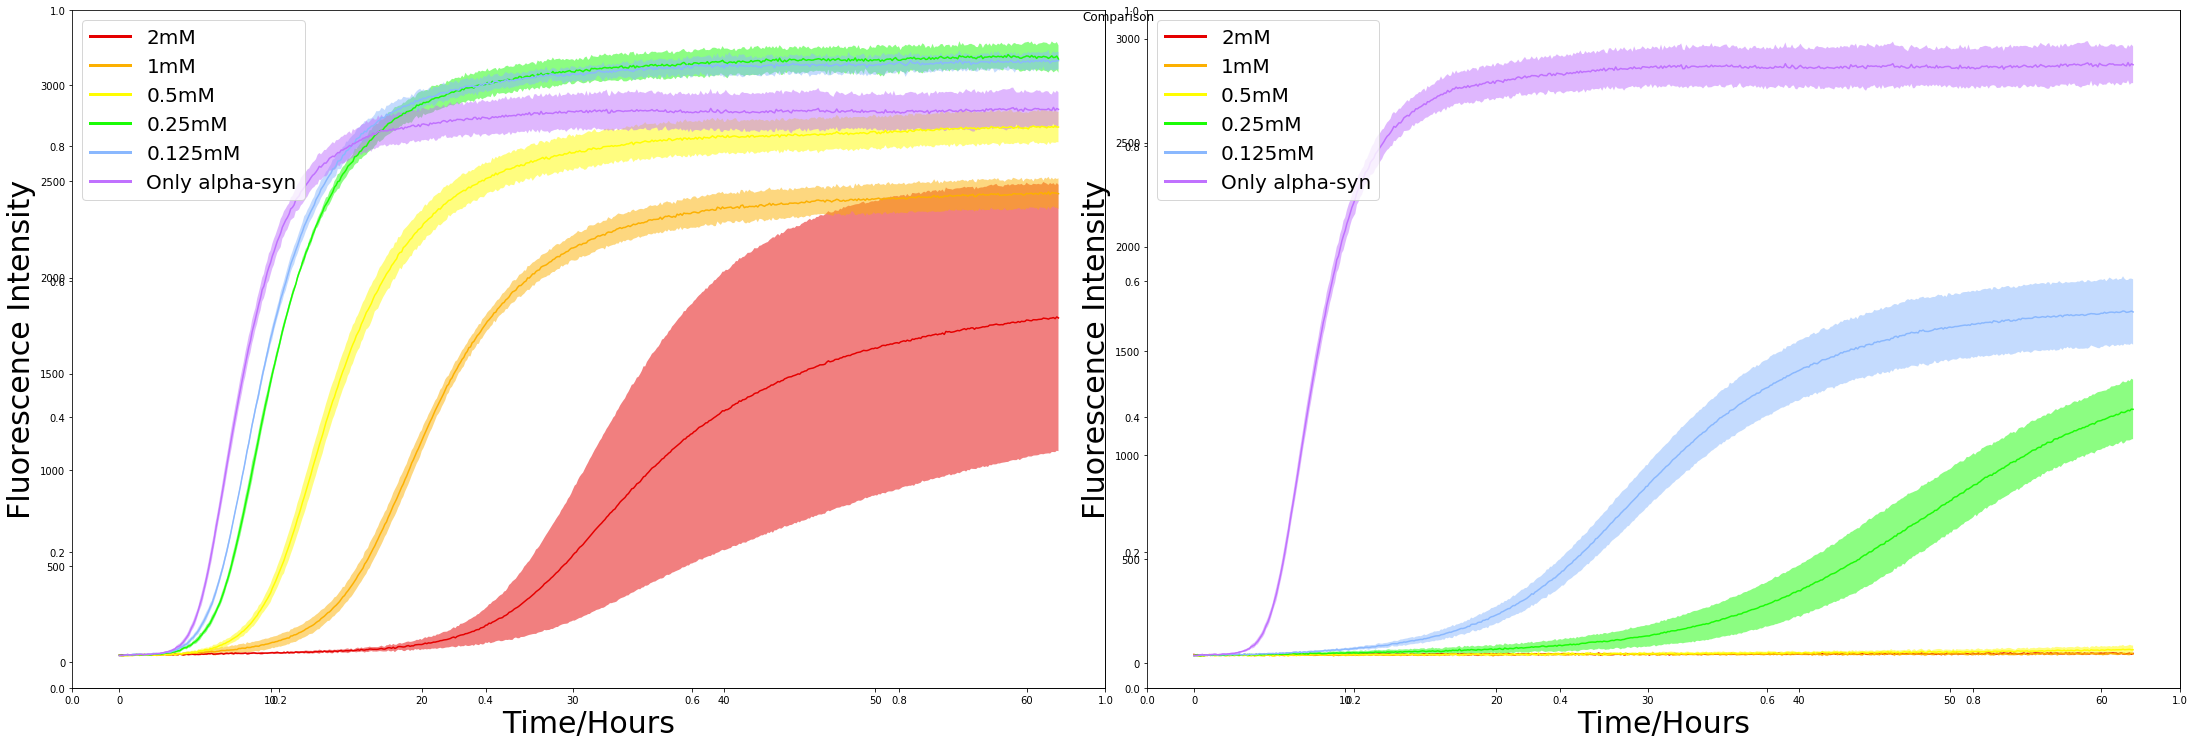

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

fig.suptitle('Comparison')

ax = fig.add_subplot(1,2,1)
fig1 = (plotave(variable_1), plotave(variable_2), plotave(variable_3), plotave(variable_4), plotave(variable_5), plotave(variable_11))
plt.xlabel('Time/Hours',fontsize=30)
plt.ylabel('Fluorescence Intensity',fontsize=30)

colors = col_list_palette #Use the pallet that we made earlier
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['2mM', '1mM', '0.5mM', "0.25mM", "0.125mM", "Only alpha-syn"]
ax.legend(lines, labels, prop={"size":20}, loc='upper left') #you can set the location yourself




#fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
ax = fig.add_subplot(1,2,2)
fig2 = (plotave(variable_6), plotave(variable_7), plotave(variable_8), plotave(variable_9), plotave(variable_10), plotave(variable_11))
plt.xlabel('Time/Hours',fontsize=30)
plt.ylabel('Fluorescence Intensity',fontsize=30)

colors = col_list_palette #Use the pallet that we made earlier
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
labels = ['2mM', '1mM', '0.5mM', "0.25mM", "0.125mM", "Only alpha-syn"]
ax.legend(lines, labels, prop={"size":20}, loc='upper left')


plt.savefig("fig_inside.png",dpi=300)
plt.show()


If you have any questions, you are welcome to contact: tinna.palmadottir@biochemistry.lu.se